# Data Preparation

## Importing Relevant Modules and Datasets

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [6]:
#Rotten Tomatoes datasets
rot_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

#iMDB datasets
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_titles = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

#Box Office Mojo
bojo_gross = pd.read_csv('zippedData/bom.movie_gross.csv')

#the Movied DB
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

#Movie bydget DB
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

## Creating Joined Data Table (iMDB + TN Budget)

In [7]:
#setting indexes to 'tconst' for each dataset to prep for inner join
imdb_titles.set_index('tconst', inplace=True)
imdb_ratings.set_index('tconst', inplace=True)

In [8]:
#joining dfs using inner join to get iMDB movies that contain both titles and ratings
imdb_titles_ratings = imdb_titles.join(imdb_ratings, how='inner')

imdb_titles_ratings.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [9]:
#Function to tranform money columns into cleaned integers dtyes
def money_cleaner(df, column_name, new_col_name):
    df[new_col_name] = df[column_name].map(lambda x: x.replace('$', ''))
    df[new_col_name] = df[new_col_name].map(lambda x: x.replace(',', ''))
    df[new_col_name] = pd.to_numeric(df[new_col_name])
    
    return df[new_col_name]

#Cleaning budget column
budget_clean = money_cleaner(budget, 'production_budget', 'budget_clean')
budget['budget_clean'] = budget_clean

#Cleaning world_wide_Gross column
worldwide_gross = money_cleaner(budget, 'worldwide_gross', 'ww_gross_clean')
budget['ww_gross_clean'] = worldwide_gross

budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   budget_clean       5782 non-null   int64 
 7   ww_gross_clean     5782 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 361.5+ KB


In [10]:
#Creates a production_profit column to determine how much profit each movie made
#after budget accounted for
budget['production_profit'] = budget['ww_gross_clean'] - budget['budget_clean']
budget.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,1045663875,635063875


In [11]:
imdb_titles_ratings.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [12]:
#Merges the iMDB databases w/ financial info for more complete dataset

movies_df = pd.merge(imdb_titles_ratings, budget, right_on='movie', left_on='original_title')
movies_df.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294
1,The Overnight,The Overnight,2010,88.0,NaN,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",200000,1165996,965996


## Cleaning Data Table

In [13]:
#5 items w/o genres; 106 items w/o runtime; 2638 items total
movies_df.info()

#since there are only 5 items w/o genre, items are dropped. Brings total to 2633
movies_df.dropna(subset=['genres'], inplace=True)

#runtime will not be used in final analysis, so no cleaning will be performed 
#on items 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 0 to 2637
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2638 non-null   object 
 1   original_title     2638 non-null   object 
 2   start_year         2638 non-null   int64  
 3   runtime_minutes    2532 non-null   float64
 4   genres             2633 non-null   object 
 5   averagerating      2638 non-null   float64
 6   numvotes           2638 non-null   int64  
 7   id                 2638 non-null   int64  
 8   release_date       2638 non-null   object 
 9   movie              2638 non-null   object 
 10  production_budget  2638 non-null   object 
 11  domestic_gross     2638 non-null   object 
 12  worldwide_gross    2638 non-null   object 
 13  budget_clean       2638 non-null   int64  
 14  ww_gross_clean     2638 non-null   int64  
 15  production_profit  2638 non-null   int64  
dtypes: float64(2), int64(6),

In [14]:
# There are 541 titles that are duplicates in the data frame, 2633 total
movies_df.duplicated(subset='primary_title').sum()

#Creates new series with booleans to see if entry is duplicate
movies_df['duplicates'] = movies_df.duplicated(subset='primary_title')


In [15]:
#drops duplicat entries while keeping first entry (2633-541 = 2092)
movies_df.drop_duplicates(keep='first', subset='primary_title', inplace=True)

#Sucessfully dropped duplicate entries
movies_df.shape

(2092, 17)

In [16]:
#the start_year column is misleading. It does not always represent the actual 
#release date (e.g., Action Jackson came out in 1988, but start date is 2014)

#One solution is to convert the release date to datetime in a new column
movies_df['date_released'] = pd.to_datetime(movies_df['release_date'])

#Another solution create a column with only the year and overwrite start_year
movies_df['start_year'] = movies_df['release_date'].map(lambda x: x[-4:])

#The last step is to convert the column into an int64 dtype
movies_df['start_year'] = pd.to_numeric(movies_df['start_year'])


## Creating Top 100 Data Table

In [17]:
#organizing df for top 100 worldwide grossing films
top_100_df = movies_df.sort_values(by='ww_gross_clean', ascending=False)[:100].copy()

#cleaning up the df to only include necessary columns
top_100_df.drop(['original_title', 'runtime_minutes', 'id', 'movie', 'production_budget', 'worldwide_gross', 'duplicates', 'release_date'], axis=1, inplace=True)

top_100_df.shape

(100, 10)

## Creating Top 2021 Movies Table Using Webscraping

In [18]:
#Using webscraping to pull the info of the top films of 2021 using 
#Box Office MoJo

from bs4 import BeautifulSoup
import requests
html_page = requests.get("https://www.boxofficemojo.com/year/2021/?ref_=bo_lnav_hm_shrt")

soup = BeautifulSoup(html_page.content, 'html.parser')


In [19]:
#finding relevant division and creating container
table = soup.find('div', id='table')

#seperates all the relevant rows with movie data from table headers
table_rows = table.findAll('tr')[1:]

#length outputs 200 items, which corresponds to the 200 items on the website
len(table_rows)

200

In [20]:
#Now to extract information from the first row to serve as a template for
#other rows 
table_rows[0]

<tr><td class="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column">1</td><td class="a-text-left mojo-field-type-release mojo-cell-wide"><a class="a-link-normal" href="/release/rl3490022913/?ref_=bo_yld_table_1">Shang-Chi and the Legend of the Ten Rings</a></td><td class="a-text-left mojo-field-type-genre hidden">-</td><td class="a-text-right mojo-field-type-money hidden">-</td><td class="a-text-right mojo-field-type-duration hidden">-</td><td class="a-text-right mojo-field-type-money mojo-estimatable">$223,152,296</td><td class="a-text-right mojo-field-type-positive_integer">4,300</td><td class="a-text-right mojo-field-type-money mojo-estimatable">$223,152,296</td><td class="a-text-left mojo-field-type-date a-nowrap">Sep 3</td><td class="a-text-left mojo-field-type-studio"><a class="a-link-normal" href="https://pro.imdb.com/company/co0226183/boxoffice/?view=releases&amp;ref_=mojo_yld_table_1&amp;rf=mojo_yld_table_1" rel="noopener" target="_blank">Walt D

In [21]:
#finding rank
rank = table_rows[0].find('td', class_="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column").text
rank

'1'

In [22]:
#finding title
title = table_rows[0].find('td', class_= "a-text-left mojo-field-type-release mojo-cell-wide").text
title

'Shang-Chi and the Legend of the Ten Rings'

In [23]:
#finding amount grossed
gross = table_rows[0].find('td', class_ = "a-text-right mojo-field-type-money mojo-estimatable").text
gross

'$223,152,296'

In [24]:
#finding release data
release_date = table_rows[0].find('td', class_ = "a-text-left mojo-field-type-date a-nowrap").text
release_date

'Sep 3'

In [25]:
#finding studio
studio =  table_rows[0].find('td',class_ = "a-text-left mojo-field-type-studio").text.strip()
studio

'Walt Disney Studios Motion Pictures'

In [26]:
def get_movie_data(movie_table):
    movie_data = []
    for row in movie_table:
        rank = row.find('td', class_="a-text-right mojo-header-column mojo-truncate mojo-field-type-rank mojo-sort-column").text
        title = row.find('td', class_= "a-text-left mojo-field-type-release mojo-cell-wide").text
        gross = row.find('td', class_ = "a-text-right mojo-field-type-money mojo-estimatable").text
        release_date = row.find('td', class_ = "a-text-left mojo-field-type-date a-nowrap").text
        studio = row.find('td',class_ = "a-text-left mojo-field-type-studio").text.strip()
        
        movie_data.append({'Rank': rank, 'Title': title, 'Gross': gross, 
                           'Release Date': release_date, 'Studio': studio})
    return movie_data

In [27]:
movie_data = get_movie_data(table_rows)

In [28]:
rankings_2021_df = pd.DataFrame(movie_data)


In [29]:
#applying money_cleaner function to gross column
gross_clean = money_cleaner(rankings_2021_df, 'Gross', 'Gross_Clean')

#adds column to existing df
rankings_2021_df['Gross_Clean'] = gross_clean
rankings_2021_df.head()

,Rank,Title,Gross,Release Date,Studio,Gross_Clean
0,1,Shang-Chi and the Legend of the Ten Rings,"$223,152,296",Sep 3,Walt Disney Studios Motion Pictures,223152296
1,2,Venom: Let There Be Carnage,"$192,114,061",Oct 1,Sony Pictures Entertainment (SPE),192114061
2,3,Black Widow,"$183,651,655",Jul 9,Walt Disney Studios Motion Pictures,183651655
3,4,F9: The Fast Saga,"$173,005,945",Jun 25,Universal Pictures,173005945
4,5,A Quiet Place Part II,"$160,072,261",May 28,Paramount Pictures,160072261


# Preliminary Analysis: Getting Descriptive Statistics

## What percent of movies have made between 2010 and 2019? 

In [30]:

#filtering based on start year, currently 2092 entries
filt = (movies_df['start_year']>=2015)

movies_df.loc[filt]

#1795 entries after the filter for after 2010 = 86% of movies in df
#778 for entries for after 2015 = 37% of movies in df



,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit,duplicates,date_released
2,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",200000,1165996,965996,False,2015-06-19
8,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864,False,2015-06-12
23,Alita: Battle Angel,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,24,"Feb 14, 2019",Alita: Battle Angel,"$170,000,000","$85,710,210","$402,976,036",170000000,402976036,232976036,False,2019-02-14
25,Before We Go,Before We Go,2015,95.0,"Comedy,Drama,Romance",6.8,45181,52,"Sep 4, 2015",Before We Go,"$3,000,000","$37,151","$483,938",3000000,483938,-2516062,False,2015-09-04
27,The History of Love,The History of Love,2016,134.0,"Drama,Romance,War",6.3,1024,12,"Nov 18, 2016",The History of Love,"$20,000,000",$0,"$476,624",20000000,476624,-19523376,False,2016-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2624,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",7.4,2724,8,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806",1500000,98806,-1401194,False,2018-07-20
2626,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462,78,"Feb 13, 2019",Happy Death Day 2U,"$9,000,000","$28,051,045","$64,179,495",9000000,64179495,55179495,False,2019-02-13
2628,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173,64,"Aug 14, 2019",Blinded by the Light,"$15,000,000",$0,$0,15000000,0,-15000000,False,2019-08-14
2631,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628,29,"Sep 21, 2018",Fahrenheit 11/9,"$5,000,000","$6,352,306","$6,653,715",5000000,6653715,1653715,False,2018-09-21


## Of the top 100 grossing films, how many came out since 2015?

In [31]:
#creating filter 
filt = (top_100_df['start_year'] >= 2011)

top_100_df.loc[filt].shape

#48 of the top 100 came out between 2015 and 2019
#98 of the top 100 came out in the last 10 years
#only one entry before 2000 and one entry from 2005. 


(90, 10)

## Which studios have performed the best this year? How much have the grossed?

In [32]:
#sorts by the studio name and then sums the values of total gross per studio
studio_gross = rankings_2021_df.groupby('Studio').sum('Gross_Clean').sort_values(by='Gross_Clean', ascending=False)

studio_gross.head()

#Based of this:
## Disney has made: $665,007,950
## Universal has made: $568,362,680
## Warner Bro's has made: $549,557,233
## Sony Pictures has made: $262,300,507
## Paramount Pictures has made: $229,508,894

,Gross_Clean
Studio,
Walt Disney Studios Motion Pictures,665007950
Universal Pictures,568362680
Warner Bros.,549557233
Sony Pictures Entertainment (SPE),262300507
Paramount Pictures,229508894


In [33]:
movies_df.sort_values(by='date_released', ascending=False)[:50]

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit,duplicates,date_released
2419,Eli,Eli,2019,154.0,Comedy,4.7,96,16,"Dec 31, 2019",Eli,"$11,000,000",$0,$0,11000000,0,-11000000,False,2019-12-31
1216,Reagan,Reagan,2019,105.0,"Biography,Documentary",7.4,732,30,"Dec 31, 2019",Reagan,"$25,000,000",$0,$0,25000000,0,-25000000,False,2019-12-31
1812,Midway,Midway,2019,85.0,"Documentary,Family",7.3,43,53,"Nov 8, 2019",Midway,"$59,500,000",$0,$0,59500000,0,-59500000,False,2019-11-08
2421,Unhinged,Unhinged,2019,93.0,Horror,4.2,512,30,"Sep 30, 2019",Unhinged,"$29,000,000",$0,$0,29000000,0,-29000000,False,2019-09-30
2420,Agenda: Payback,Unhinged,2019,95.0,Thriller,4.2,184,30,"Sep 30, 2019",Unhinged,"$29,000,000",$0,$0,29000000,0,-29000000,False,2019-09-30
2628,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173,64,"Aug 14, 2019",Blinded by the Light,"$15,000,000",$0,$0,15000000,0,-15000000,False,2019-08-14
1254,Crawl,Crawl,2019,80.0,"Crime,Thriller",4.7,1095,16,"Jul 12, 2019",Crawl,"$17,000,000",$0,$0,17000000,0,-17000000,False,2019-07-12
1786,The Command,Kursk,2019,117.0,"Action,Drama,History",6.5,7261,39,"Jun 21, 2019",Kursk,"$40,000,000",$0,"$4,212,799",40000000,4212799,-35787201,False,2019-06-21
1785,Kursk,Kursk,2019,NaN,Drama,5.5,14,39,"Jun 21, 2019",Kursk,"$40,000,000",$0,"$4,212,799",40000000,4212799,-35787201,False,2019-06-21
2438,Burn Your Maps,Burn Your Maps,2019,102.0,Adventure,7.9,240,48,"Jun 21, 2019",Burn Your Maps,"$8,000,000",$0,$0,8000000,0,-8000000,False,2019-06-21


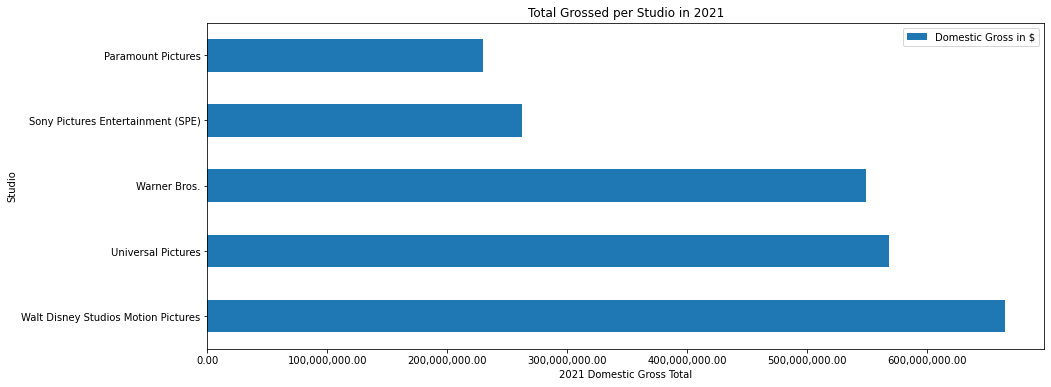

In [34]:
#Creates horizontal bargraph visualiation
ax = studio_gross[:5].plot(kind='barh', figsize=(15, 6))
#sns.barplot(data=studio_gross, x=studio_gross.index[:5], y=studio_gross['Gross_Clean'][:5])

ax.set_xlabel('2021 Domestic Gross Total')
ax.xaxis.set_major_formatter("{x:,.2f}")
ax.legend(['Domestic Gross in $'], loc='upper right')
ax.set_title('Total Grossed per Studio in 2021');

##HOW to reorganize barcahrt with most profitable at top?

# Question #1: Which Movie Genres are Most Successful/Profitable?

## Creating Genre Data Frame

In [35]:
#Currently movie genres are clumped together and need to be seperated into 
#distinct rows

#Splits/seperates each genre category for each movie/row
movies_df['genres_list'] = movies_df['genres'].map(lambda x: x.split(','))
movies_df.head(2)

#Creates new df with each genre category represented in a row
genres_df = movies_df.explode('genres_list')
genres_df.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit,duplicates,date_released,genres_list
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294,False,2012-12-31,Action
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294,False,2012-12-31,Animation


## Visual #1: Profit of Various Movie Genres

In [57]:
#order=
genre_means = genres_df.groupby('genres_list').mean()['production_profit']\
                                    .sort_values(ascending=False)
genre_means.index

Index(['Animation', 'Adventure', 'Sci-Fi', 'Action', 'Fantasy', 'Musical',
       'Family', 'Comedy', 'Thriller', 'Mystery', 'Music', 'Sport',
       'Biography', 'Horror', 'Crime', 'Drama', 'Romance', 'History',
       'Western', 'War', 'Documentary'],
      dtype='object', name='genres_list')

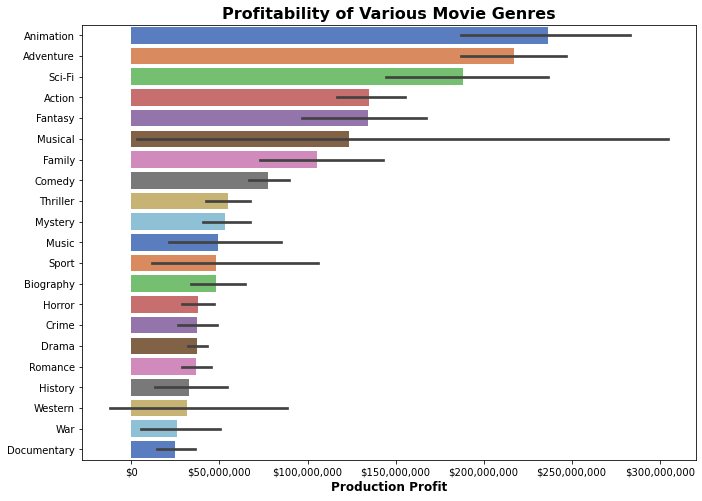

In [85]:
#plotting horizontal bar graph

ax = sns.barplot(data=genres_df, y='genres_list', x='production_profit', 
                 order=genre_means.index, palette='muted')


ax.get_figure().set_size_inches((11, 8))

##?? HOW to order by profit rather than genre category?? 
ax.set_xlabel('Production Profit', fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter("${x:,.0f}")

##?? HOW to rotate xlabels?

ax.set_ylabel(ylabel=None)

ax.set_title('Profitability of Various Movie Genres', fontsize=16, fontweight='bold')

plt.savefig('./images/genre_profit.png', facecolor='white');
##link_to_data_vis = https://github.com/flatiron-school/ds-flex-fundamentals-of-data-visualization-2021

In [59]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

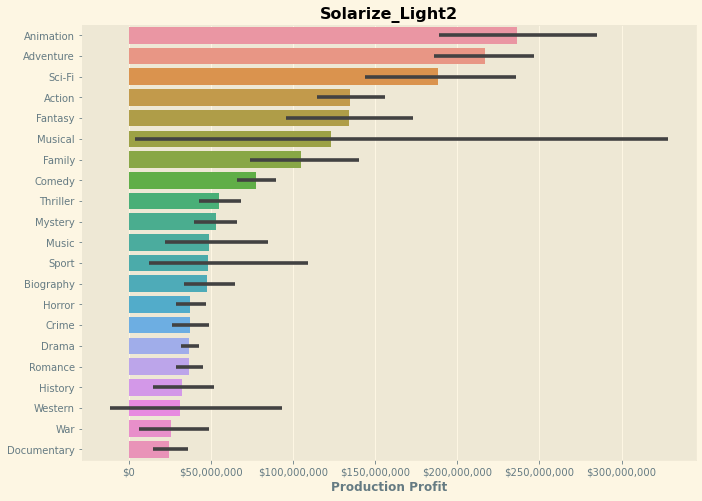

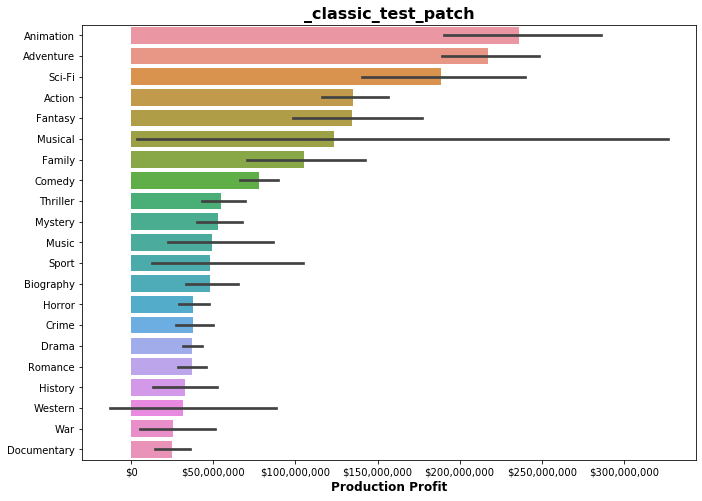

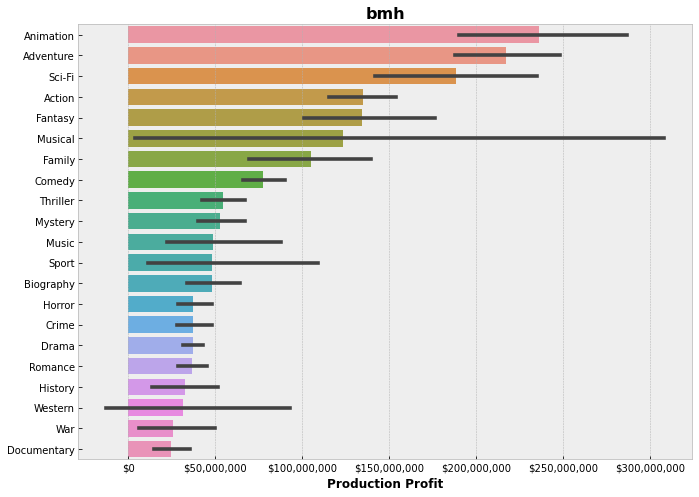

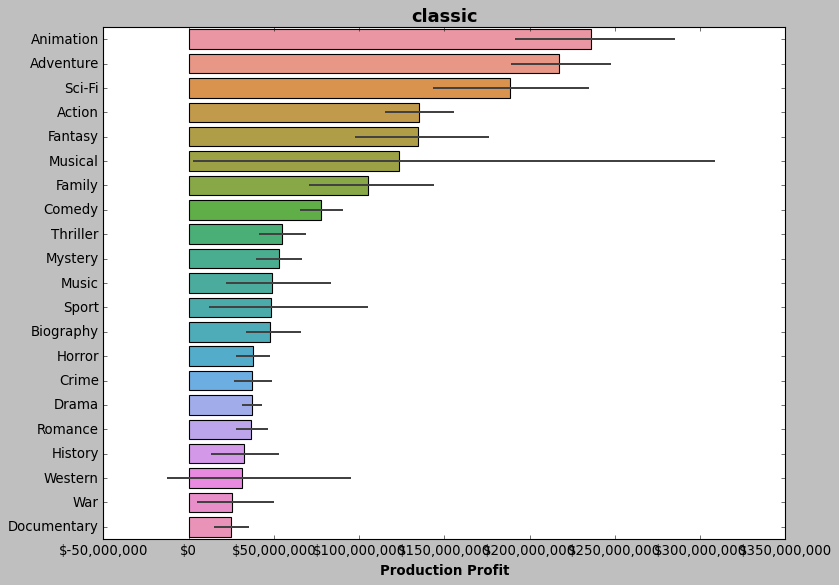

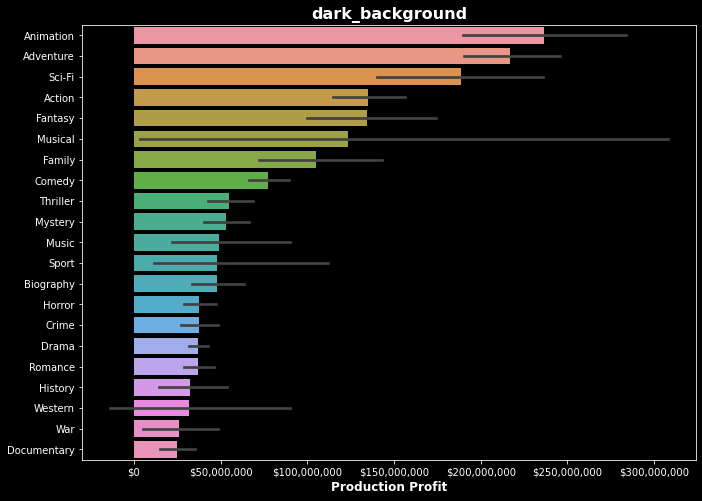

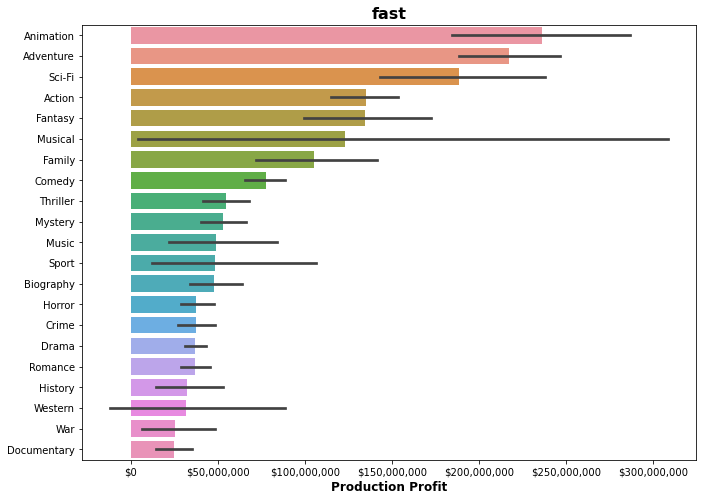

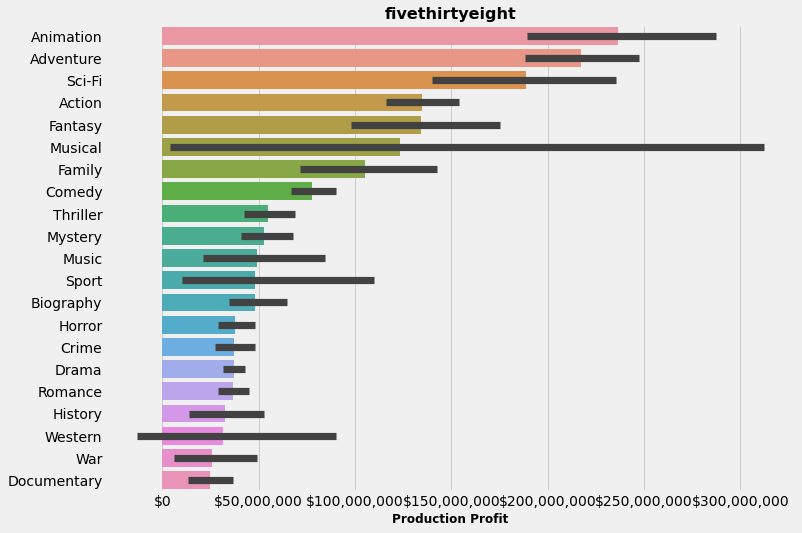

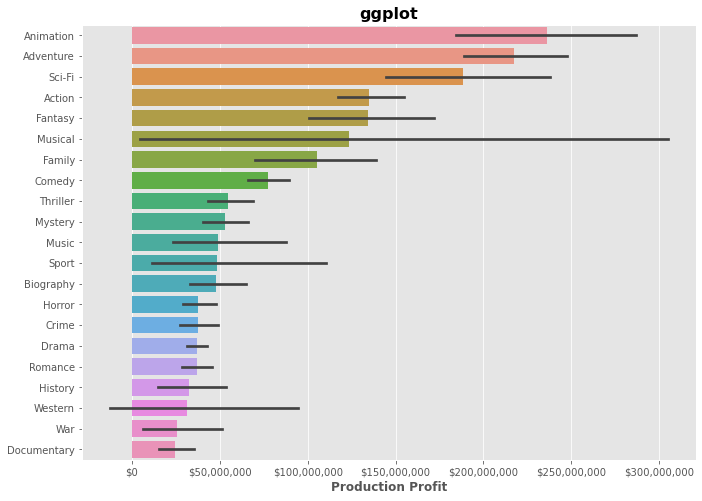

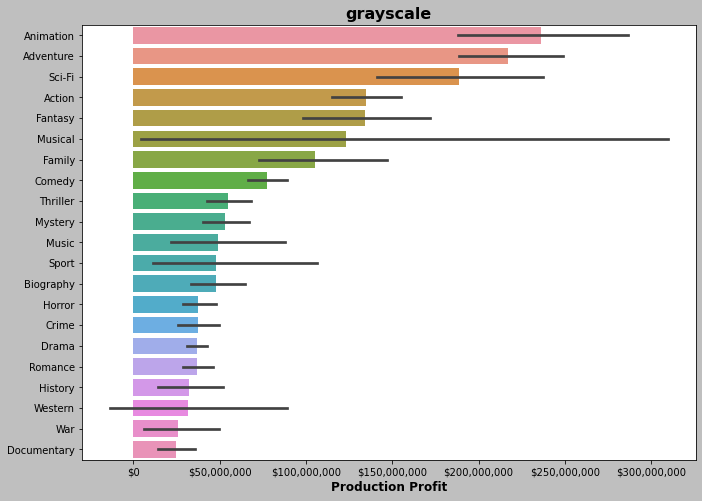

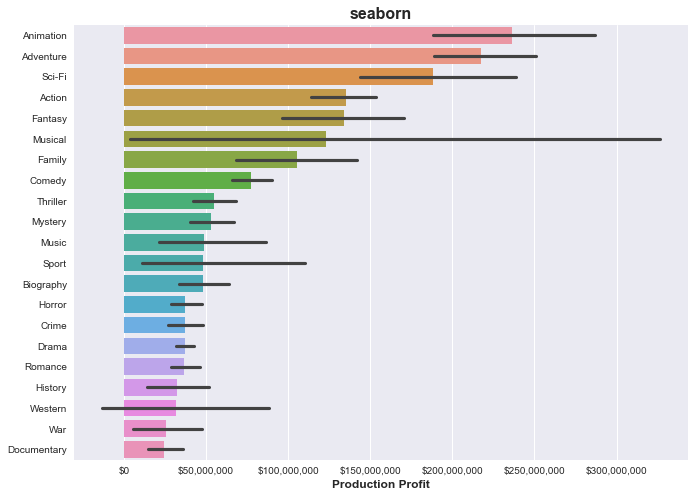

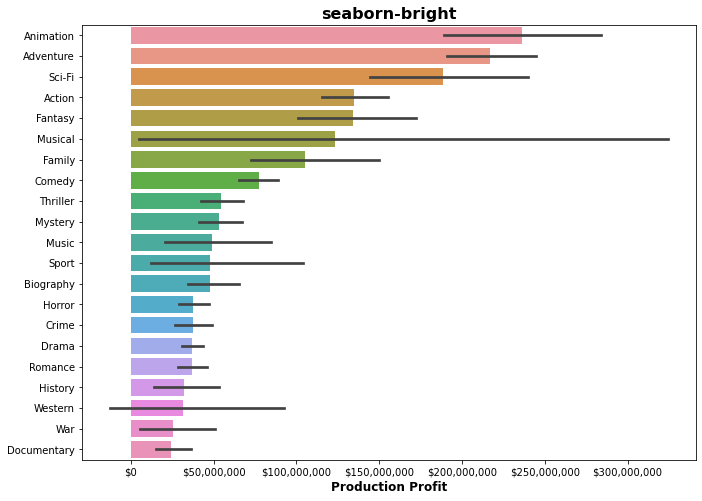

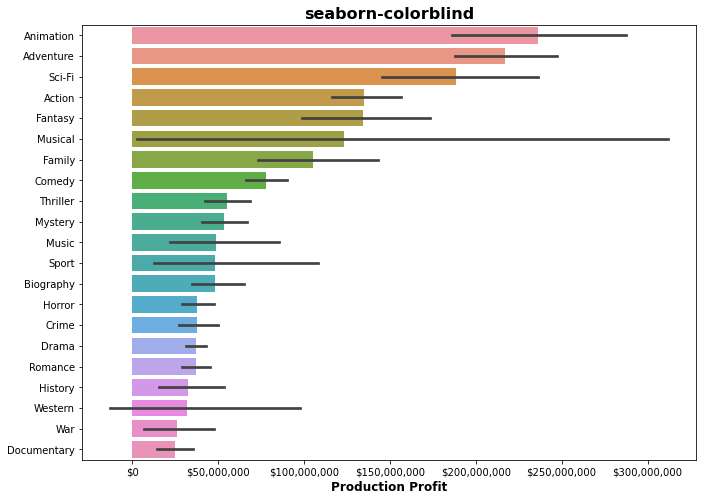

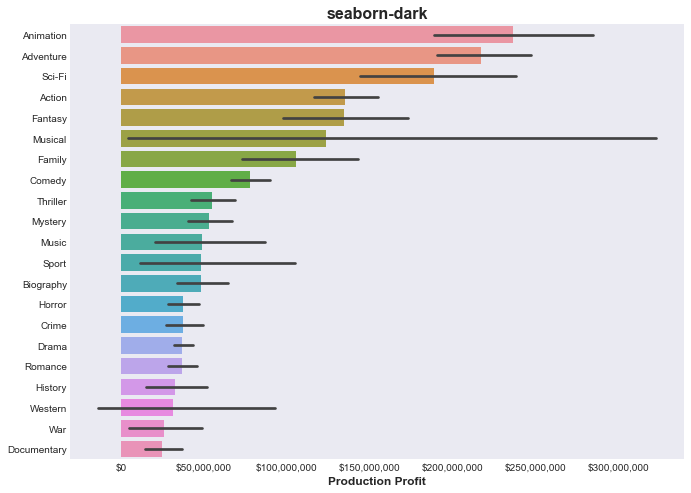

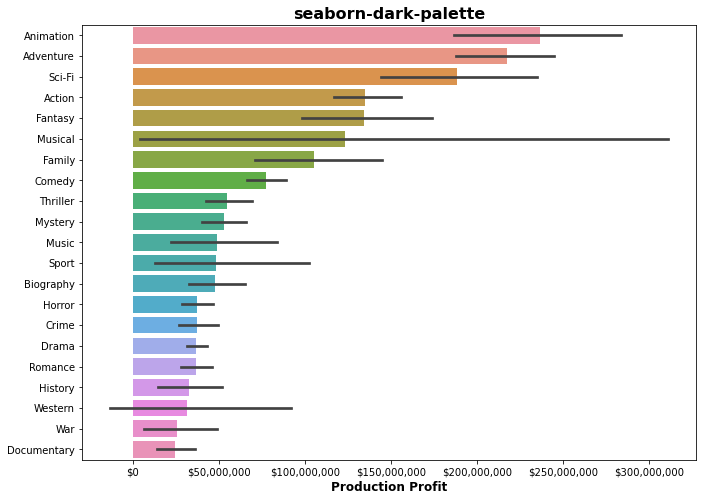

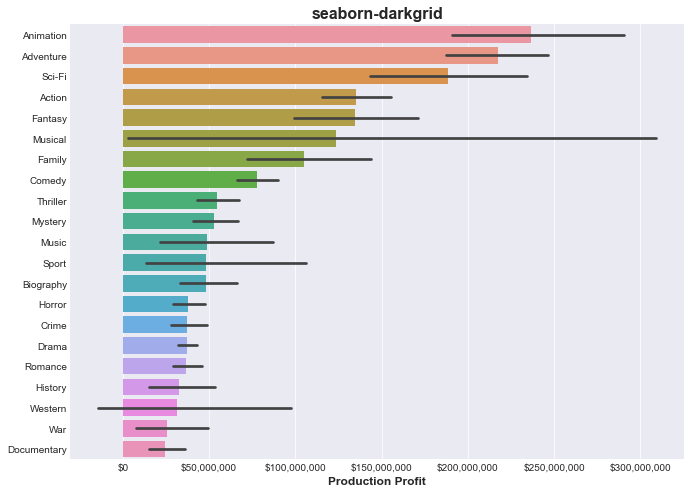

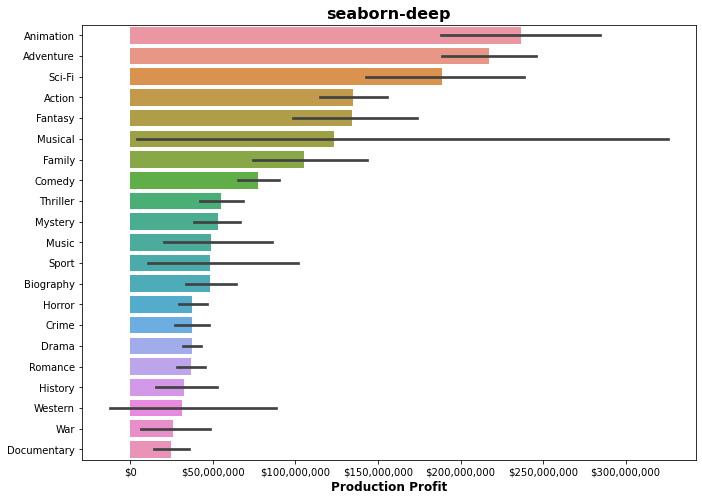

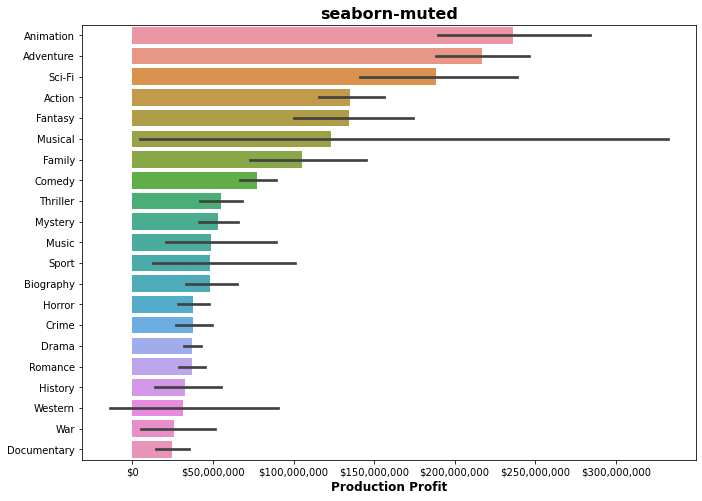

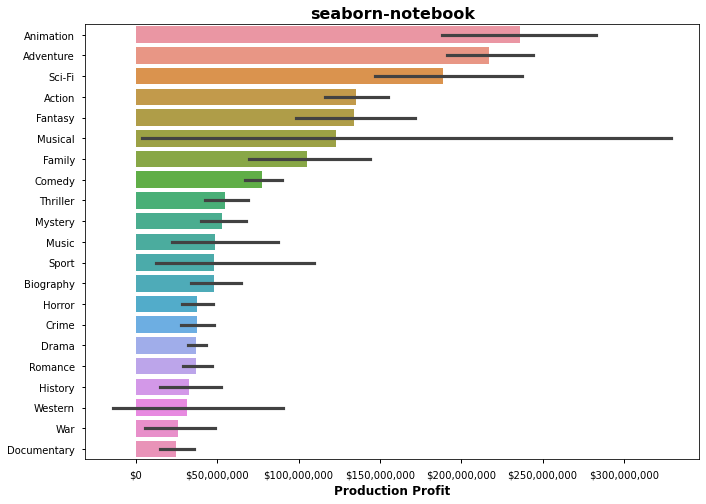

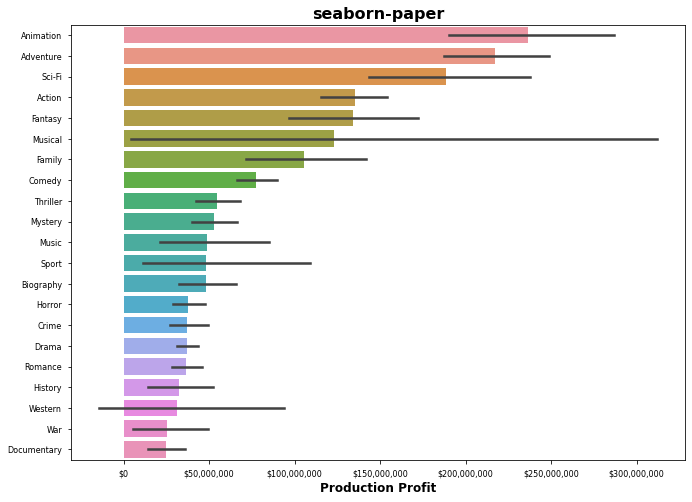

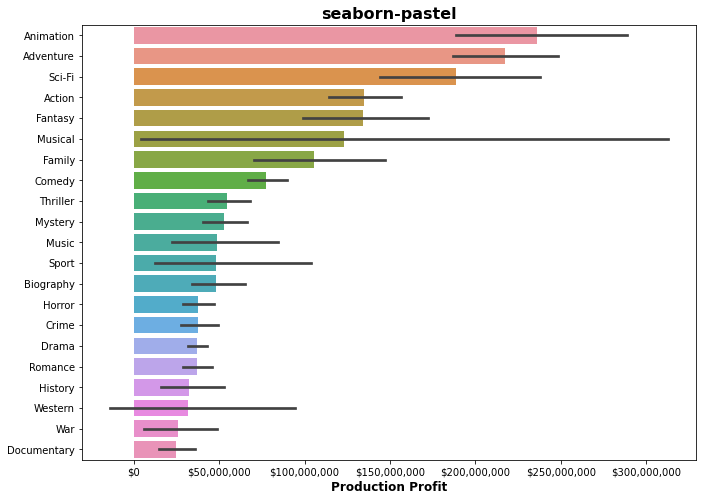

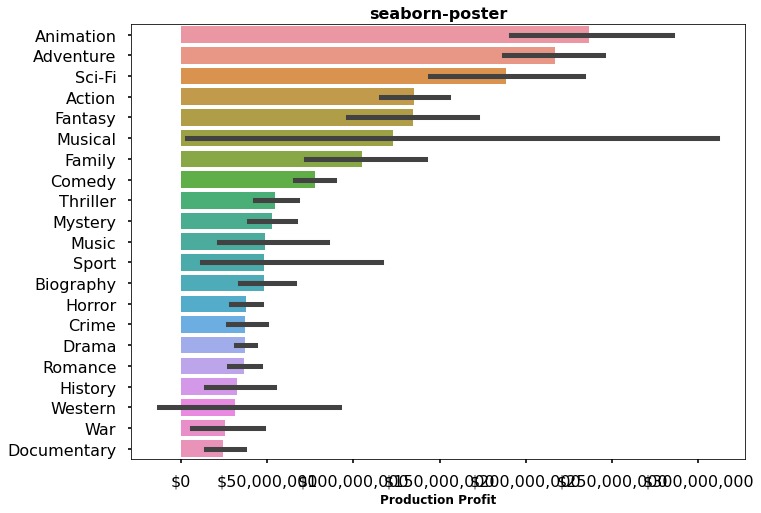

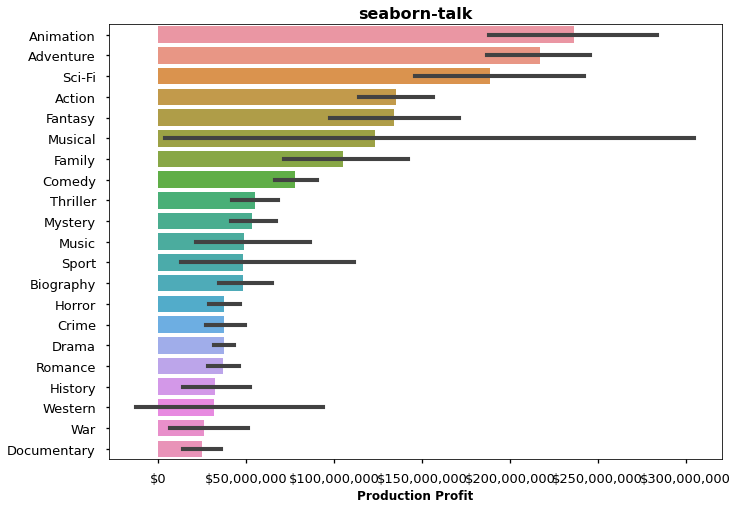

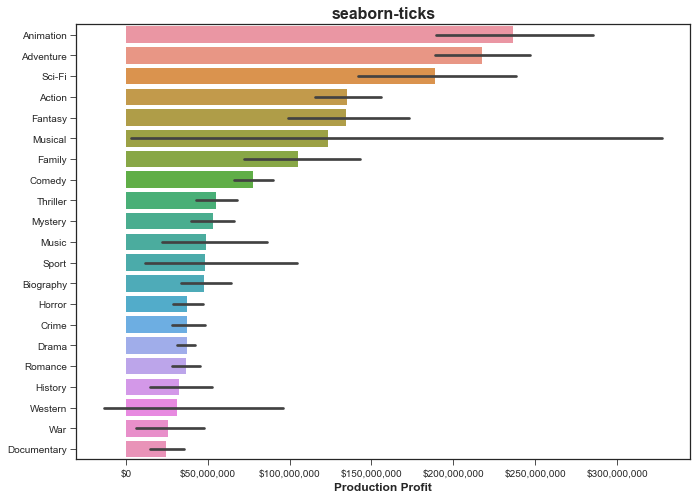

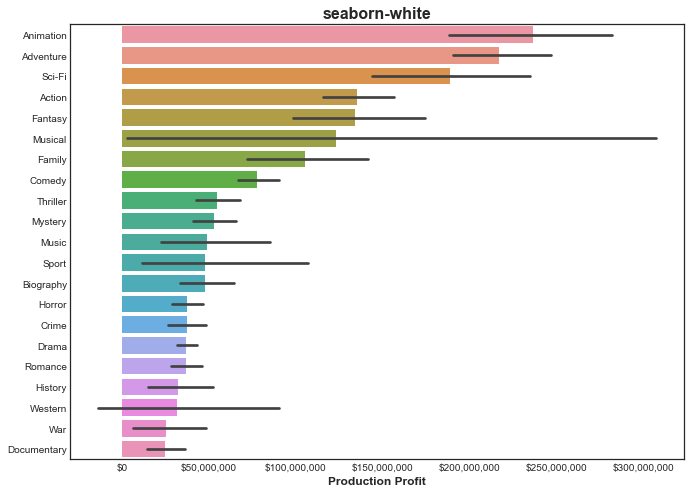

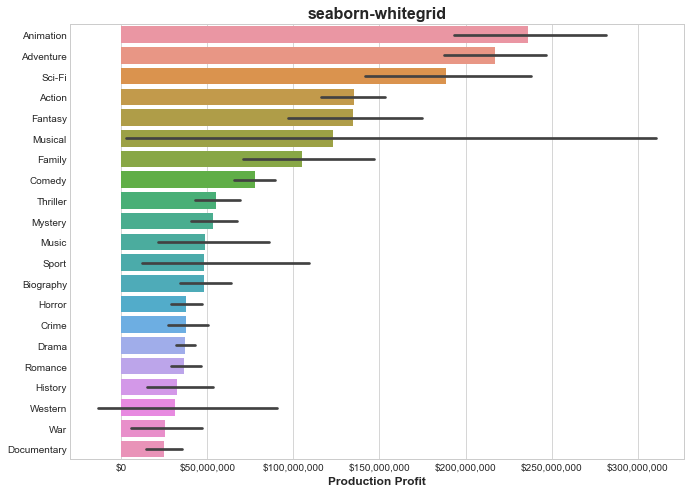

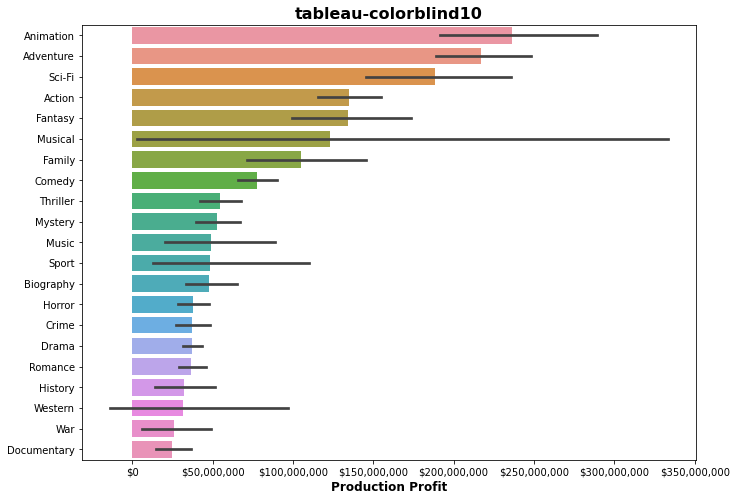

In [60]:
for style in plt.style.available:
    with plt.style.context(style):
        

#plotting horizontal bar graph
        ax = sns.barplot(data=genres_df, y='genres_list', x='production_profit', 
                         order=genre_means.index)


        ax.get_figure().set_size_inches((11, 8))

        ##?? HOW to order by profit rather than genre category?? 
        ax.set_xlabel('Production Profit', fontsize=12, fontweight='bold')
        ax.xaxis.set_major_formatter("${x:,.0f}")

        ##?? HOW to rotate xlabels?

        ax.set_ylabel(ylabel=None)

        ax.set_title(style, fontsize=16, fontweight='bold')
        plt.show();
##link_to_data_vis = https://github.com/flatiron-school/ds-flex-fundamentals-of-data-visualization-2021

# Question #2:  What is the average movie profit since 2010?

## Visual: Average Movie Profit Broken Down by Year

In [37]:
movies_df.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit,duplicates,date_released,genres_list
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294,False,2012-12-31,"[Action, Animation, Comedy]"
2,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",200000,1165996,965996,False,2015-06-19,"[Comedy, Mystery]"


In [38]:
#Data frame contains years 2010-2019
movies_df['start_year'].value_counts()
filt=movies_df['start_year']>=2005

movies_2005_up = movies_df.loc[filt]

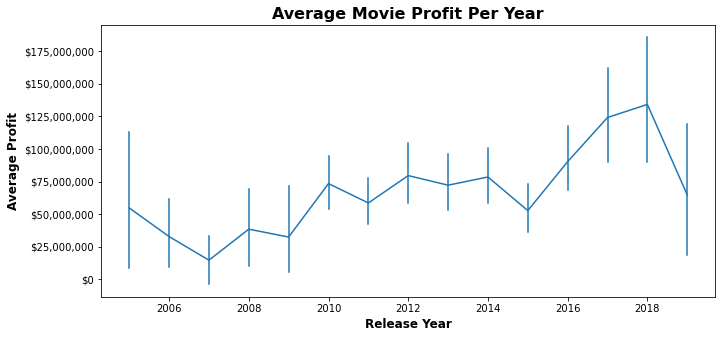

In [62]:
#Creating barplot to see distribution of movie profit per year

fig, ax = plt.subplots(figsize=(11,5))

ax = sns.lineplot(data=movies_2005_up, x='start_year', y='production_profit', 
                  err_style='bars')


ax.set_xlabel('Release Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Profit', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter("${x:,.0f}")


ax.set_title('Average Movie Profit Per Year', fontsize=16, fontweight='bold');

## Visual: Average Profit and Budget Per Movie

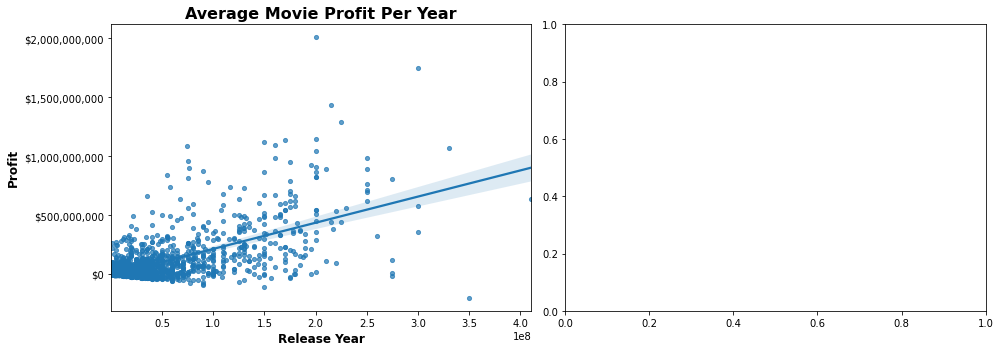

In [65]:
fig, axes = plt.subplots(figsize=(14,5), ncols=2)


#Average movie profit scatterplot
sns.regplot(data=movies_df, x='budget_clean', y='production_profit', 
                     ax=axes[0], scatter_kws = dict(alpha=0.7, s=17))

axes[0].set_xlabel('Release Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Profit', fontsize=12, fontweight='bold')
axes[0].yaxis.set_major_formatter("${x:,.0f}")
axes[0].set_title('Average Movie Profit Per Year', fontsize=16, fontweight='bold')

#Average movie budget per year
# sns.scatterplot(data=movies_df, x='date_released', y='budget_clean', 
#                      alpha=0.7, s=17, ax=axes[1])

# axes[1].set_xlabel('Release Year', fontsize=12, fontweight='bold')
# axes[1].set_ylabel('Budget', fontsize=12, fontweight='bold')
# axes[1].yaxis.set_major_formatter("${x:,.0f}")
# axes[1].set_title('Average Movie Budget Per Year', fontsize=16, fontweight='bold');

fig.tight_layout();


## HOW to set ylim and zoom in? Can I create a replot here? Do I need to change 
## date values to integers?

# Question #3: What is the average budget per film since 2010?

In [41]:
movies_df['budget_clean'].describe()

count    2.092000e+03
mean     3.669263e+07
std      5.024722e+07
min      1.400000e+03
25%      5.000000e+06
50%      1.800000e+07
75%      4.500000e+07
max      4.106000e+08
Name: budget_clean, dtype: float64

In [42]:
movies_2005_up['budget_clean'].describe()


count    1.887000e+03
mean     3.778449e+07
std      5.190318e+07
min      1.400000e+03
25%      5.000000e+06
50%      1.800000e+07
75%      4.500000e+07
max      4.106000e+08
Name: budget_clean, dtype: float64

## What Percent of Movies Were Profitable?

In [43]:
#1887 entries
#1142 were profitable (more than a million) = 60.5%
#976 made more than 10 million = 51.7%
#398 made more than 100 million = 21.1%
filt = (movies_2005_up['production_profit']>100000000)
movies_2005_up.loc[filt]

#HOW could I make this into a chart?? 

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit,duplicates,date_released,genres_list
8,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215000000,1648854864,1433854864,False,2015-06-12,"[Action, Adventure, Sci-Fi]"
12,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,15,"Nov 24, 2010",Tangled,"$260,000,000","$200,821,936","$586,477,240",260000000,586477240,326477240,False,2010-11-24,"[Adventure, Animation, Comedy]"
18,Real Steel,Real Steel,2011,127.0,"Action,Drama,Family",7.1,283534,31,"Oct 7, 2011",Real Steel,"$110,000,000","$85,463,309","$263,880,341",110000000,263880341,153880341,False,2011-10-07,"[Action, Drama, Family]"
20,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522",200000000,1068879522,868879522,False,2010-06-18,"[Adventure, Animation, Comedy]"
21,Mexican Devil,The Devil Inside,2012,NaN,"Horror,Thriller",6.7,34,12,"Jan 6, 2012",The Devil Inside,"$1,000,000","$53,262,945","$101,759,490",1000000,101759490,100759490,False,2012-01-06,"[Horror, Thriller]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,The Post,The Post,2017,116.0,"Biography,Drama,History",7.2,108017,9,"Dec 22, 2017",The Post,"$50,000,000","$81,903,458","$179,748,880",50000000,179748880,129748880,False,2017-12-22,"[Biography, Drama, History]"
2563,Creed II,Creed II,2018,130.0,"Drama,Sport",7.2,72503,96,"Nov 21, 2018",Creed II,"$50,000,000","$115,715,889","$213,591,522",50000000,213591522,163591522,False,2018-11-21,"[Drama, Sport]"
2564,A Quiet Place,A Quiet Place,2018,80.0,Documentary,6.6,18,66,"Apr 6, 2018",A Quiet Place,"$17,000,000","$188,024,361","$334,522,294",17000000,334522294,317522294,False,2018-04-06,[Documentary]
2593,Green Book,Green Book,2018,130.0,"Biography,Comedy,Drama",8.3,204972,71,"Nov 16, 2018",Green Book,"$23,000,000","$85,080,171","$322,034,439",23000000,322034439,299034439,False,2018-11-16,"[Biography, Comedy, Drama]"


# Question #4: How do ratings affect profitability? 

In [44]:
movies_2005_up.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_clean,ww_gross_clean,production_profit,duplicates,date_released,genres_list
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",45000000,73706,-44926294,False,2012-12-31,"[Action, Animation, Comedy]"
2,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996",200000,1165996,965996,False,2015-06-19,"[Comedy, Mystery]"


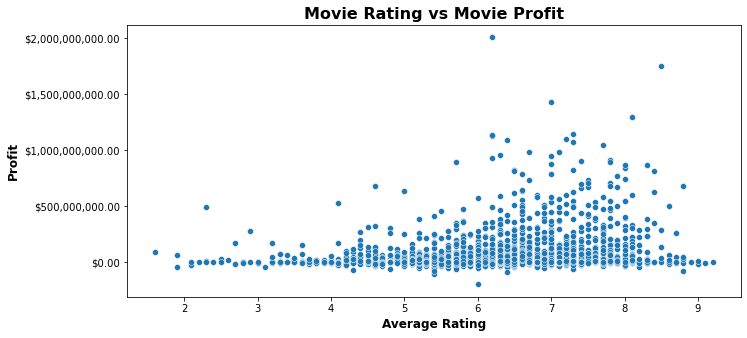

In [67]:
fig, ax = plt.subplots(figsize=(11,5))
plt.xticks()
ax = sns.scatterplot(data=movies_df,
                  y='production_profit', x='averagerating')
#alpha=0.7, s=27)

ax.set_xlabel('Average Rating', fontsize=12, fontweight='bold')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')

ax.set_ylabel('Profit', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter("${x:,.2f}")
ax.set_title("Movie Rating vs Movie Profit", fontsize=16, fontweight='bold');

#HOW to set x-tick labels and number of bins? Spacing? Rotations? 

# Question #4: What are some common traits/characteristics of the top 100 grossing films?

## Creating Top 100 Data Frame with Observed Characteristics

In [77]:
#Adding observations into columns: 1.) Is it a part of series/is it a sequel?, 
# 2.) Is it a superhero movie?, 3.) Is it animated?
id_title_dict = top_100_df['primary_title'].to_dict()

title_map = {v:'' for k, v in id_title_dict.items()}
title_map

{'Titanic': '',
 'Avengers: Infinity War': '',
 'Jurassic World': '',
 'The Avengers': '',
 'Avengers: Age of Ultron': '',
 'Black Panther': '',
 'Jurassic World: Fallen Kingdom': '',
 'Frozen': '',
 'Beauty and the Beast': '',
 'Incredibles 2': '',
 'The Fate of the Furious': '',
 'Minions': '',
 'Aquaman': '',
 'Captain America: Civil War': '',
 'Transformers: Dark of the Moon': '',
 'Captain Marvel': '',
 'Skyfall': '',
 'Transformers: Age of Extinction': '',
 'The Dark Knight Rises': '',
 'Toy Story 3': '',
 'Pirates of the Caribbean: On Stranger Tides': '',
 'Despicable Me 3': '',
 'Alice in Wonderland': '',
 'Finding Dory': '',
 'Zootopia': '',
 'The Hobbit: An Unexpected Journey': '',
 'Despicable Me 2': '',
 'Jumanji: Welcome to the Jungle': '',
 'The Jungle Book': '',
 'The Hobbit: The Desolation of Smaug': '',
 'The Hobbit: The Battle of the Five Armies': '',
 'Bohemian Rhapsody': '',
 'The Secret Life of Pets': '',
 'Spider-Man: Homecoming': '',
 'Ice Age: Continental Drift'

In [78]:
movie_dict = {'Titanic': '',
 'Avengers: Infinity War': '',
 'Jurassic World': '',
 'The Avengers': '',
 'Avengers: Age of Ultron': '',
 'Black Panther': '',
 'Jurassic World: Fallen Kingdom': '',
 'Frozen': '',
 'Beauty and the Beast': '',
 'Incredibles 2': '',
 'The Fate of the Furious': '',
 'Minions': '',
 'Aquaman': '',
 'Captain America: Civil War': '',
 'Transformers: Dark of the Moon': '',
 'Captain Marvel': '',
 'Skyfall': '',
 'Transformers: Age of Extinction': '',
 'The Dark Knight Rises': '',
 'Toy Story 3': '',
 'Pirates of the Caribbean: On Stranger Tides': '',
 'Despicable Me 3': '',
 'Alice in Wonderland': '',
 'Finding Dory': '',
 'Zootopia': '',
 'The Hobbit: An Unexpected Journey': '',
 'Despicable Me 2': '',
 'Jumanji: Welcome to the Jungle': '',
 'The Jungle Book': '',
 'The Hobbit: The Desolation of Smaug': '',
 'The Hobbit: The Battle of the Five Armies': '',
 'Bohemian Rhapsody': '',
 'The Secret Life of Pets': '',
 'Spider-Man: Homecoming': '',
 'Ice Age: Continental Drift': '',
 'Spectre': '',
 'Batman v Superman: Dawn of Justice': '',
 'The Hunger Games: Catching Fire': '',
 'Inside Out': '',
 'Venom': '',
 'Thor: Ragnarok': '',
 'Inception': '',
 'Wonder Woman': '',
 'Fantastic Beasts and Where to Find Them': '',
 'Deadpool': '',
 'Coco': '',
 'Pirates of the Caribbean: Dead Men Tell No Tales': '',
 'Deadpool 2': '',
 'Guardians of the Galaxy': '',
 'The Hunger Games: Mockingjay - Part 1': '',
 'Maleficent': '',
 'The Amazing Spider-Man': '',
 'Shrek Forever After': '',
 'X-Men: Days of Future Past': '',
 "Madagascar 3: Europe's Most Wanted": '',
 'Suicide Squad': '',
 'Monsters University': '',
 'Captain America: The Winter Soldier': '',
 'Dawn of the Planet of the Apes': '',
 'The Amazing Spider-Man 2': '',
 'The Twilight Saga: Eclipse': '',
 'It': '',
 'Gravity': '',
 'The Hunger Games': '',
 'Doctor Strange': '',
 'Man of Steel': '',
 'Interstellar': '',
 'Kung Fu Panda 2': '',
 'Justice League': '',
 'The Martian': '',
 'Men in Black 3': '',
 'Fantastic Beasts: The Crimes of Grindelwald': '',
 'Big Hero 6': '',
 'The Hunger Games: Mockingjay - Part 2': '',
 'Thor: The Dark World': '',
 'Moana': '',
 'Sing': '',
 'Fast Five': '',
 'Ant-Man and the Wasp': '',
 'Iron Man 2': '',
 'Life of Pi': '',
 'Aladdin': '',
 'Logan': '',
 'How to Train Your Dragon 2': '',
 'War of the Worlds': '',
 'Transformers: The Last Knight': '',
 'Tangled': '',
 'The Hangover Part II': '',
 'Ready Player One': '',
 'The Croods': '',
 'Fifty Shades of Grey': '',
 'The Smurfs': '',
 'Kong: Skull Island': '',
 'Cars 2': '',
 'Ted': '',
 'Puss in Boots': '',
 'Brave': '',
 'American Sniper': '',
 'Despicable Me': '',
 'X-Men: Apocalypse': ''}

In [76]:
top_100_df['primary_title'].map(title_map)

1835     
2313     
8        
110      
1787     
       ..
29       
337      
1569     
483      
2128     
Name: primary_title, Length: 100, dtype: object

In [47]:
#manually went through the movies and determined if they were a part of a series 
#or sequl
series_or_sequel= [False, True, True, True, True, True,True, True, False, True,
                  True, True, False, True, True, True, True, True, True, True,
                  True, True, False, True, False, True, True, False, False, True,
                  True, False, False, True, True, True, True, True, False, True,
                  True, False, True, False, True, False, True, True, True, True,
                  False, True, True, True, True, True, True, True, False, True,
                  True, False, False, True, True, False, False, True, True, False,
                  True, True, False, True, True, False, False, True, True, True,
                  False, False, True, True, False, True, True, True, False, False,
                  True, False, False, True, False, True, False, False, True, True]
#created new column to store values
top_100_df['series_or_sequel'] = series_or_sequel


In [48]:
#manually determing whether it was a hero-related movie or not
super_hero_film = [False, True, False, True, True, True, False, False, False, True,
               False, False, True, True, True, True, False,True, True, False,
               False, False, False, False, False, False, False, False, False, False,
               False, False, False, True, False, False, True, False, False, True,
               True, False, True, False, True, False, False, True, True, False,
                  False, True, False, True, False, True, False, True, False, True,
                  False, False, False, False, True, True, False, False, True, False,
                  False, False, True, False, True, False, False, False, True, True, 
                  False, False, True, False, False, True, False, False, False, False,
                  False, False, False, False, False, False, False, False, False, True]

#creating and adding data to relevant column
top_100_df['super_hero_film'] = super_hero_film


In [49]:
#manually determing whether film was an animated film
animation = [False, False, False, False, False, False, False, True, True, True,
            False, True, False, False, False, False, False, False, False, True,
            False, True, True, True, True, False, True, False, True, False, 
            False, False, True, False, True, False, False, False, True, False, 
             False, False, False, False, False, True, False, False, False, False,
            False, False, True, False, True, False, True, False, False, False,
            False, False, False, False, False, False, False, True, False, False,
            False, False, True, False, False, True, True, False, False, False,
            False, True, False, True, False, False, True, False, False, True,
            False, True, False, True, False, True, True, False, True, False]

top_100_df['animation'] = animation


## Plotting Visuals to Show Distribution of Characteristics 

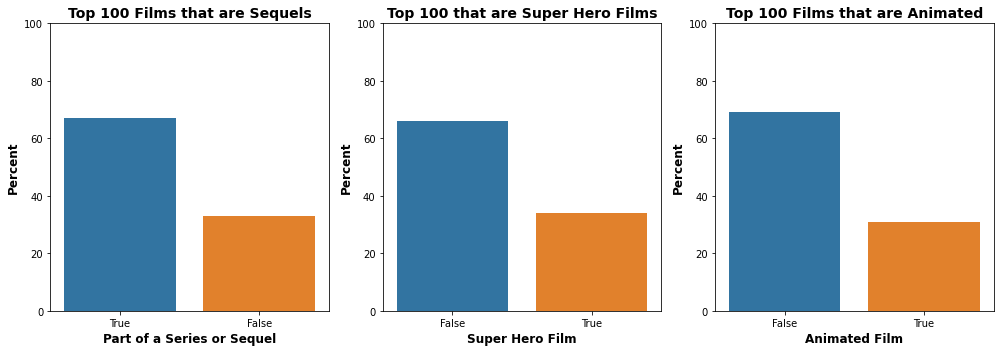

In [86]:
fig, axes = plt.subplots(figsize=(14, 5), ncols=3)

#Series/Sequel Distribution
sns.countplot(data=top_100_df, x='series_or_sequel', ax=axes[0], order=[True, False])
axes[0].set_xlabel('Part of a Series or Sequel', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Percent', fontsize=12, fontweight='bold')
axes[0].set_title( 'Top 100 Films that are Sequels', fontsize=14, fontweight='bold')
axes[0].set_ylim(0,100)


#Superhero Distribution
sns.countplot(data=top_100_df, x='super_hero_film', ax=axes[1])
axes[1].set_xlabel('Super Hero Film', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percent', fontsize=12, fontweight='bold')
axes[1].set_title( 'Top 100 that are Super Hero Films', fontsize=14, fontweight='bold')
axes[1].set_ylim(0,100)

#Animation Distribution
sns.countplot(data=top_100_df, x='animation', ax=axes[2])
axes[2].set_xlabel('Animated Film', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Percent', fontsize=12, fontweight='bold')
axes[2].set_title( 'Top 100 Films that are Animated', fontsize=14, fontweight='bold')
axes[2].set_ylim(0,100)

fig.tight_layout();

##HOW to change layout? True on right? 


In [84]:
movies_df['date_released'].dt.month_name()

0        December
2            June
3           March
6        December
7       September
          ...    
2633         July
2634     December
2635      October
2636     February
2637        March
Name: date_released, Length: 2092, dtype: object